# Bounded confidence model with networkx graph with all same weights

In [46]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

# Defining the parameters
We first define some parameters such as the number of agents n, the number of connections per agent m, the probability of rewiring a connection p, the number of time steps tmax, and the confidence threshold alpha.

In [47]:
# Graph Parameters
n = 50 # number of agents
tmax = 5000

# Bounded confidence model parameters
epsilon = 0.25 # Tolerance to differing opinions
mew = 0.01 # Adjustment rate

num_simulation = 500

# Generating Graph
We then generate an initial graph using the complete_graph function from NetworkX and assign random initial opinions to each agent.

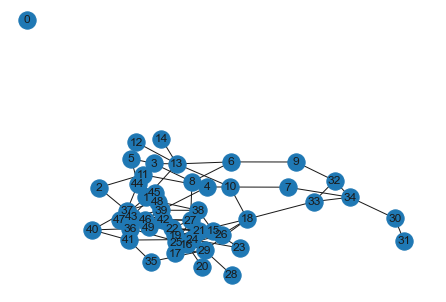

In [48]:
sizes = [15,15,5,15]
probs = [
    [0.25,0.01,0.05,0.02],
    [0.01,0.33,0.02,0.05],
    [0.05,0.02,0.5,0.01],
    [0.02,0.05,0.01,0.33]]
G = nx.stochastic_block_model(sizes,probs,seed=0)
nx.draw(G,with_labels=True)

# Simulation Loop
The simulation loop goes through each node at every time step and checks whether its opinion is within the confidence threshold of the average opinion of its neighbors. If so, the agent updates its opinion to the average. The opinions are changed at the end of each loop.

In [49]:
def simulate_loop(G, opinions, epsilon, mew, iterations):
    for t in range(iterations):
        
        new_opinions = np.ndarray.copy(opinions)
        
        for i in range(G.number_of_nodes()):
    
            # Get opinions of neighbors
            neighbors = list(G.neighbors(i))
            
            # Test if any neighbors are within tolerance and update opinions
            for j in neighbors:
                if abs(opinions[i] - opinions[j]) < epsilon:
                    new_opinions[i] = opinions[i] - mew * (opinions[i] - opinions[j])
                    new_opinions[j] = opinions[j] + mew * (opinions[i] - opinions[j])
        
        #Break if converged
        if(np.allclose(opinions,new_opinions)):
            break
        
        opinions = new_opinions
    return opinions

In [50]:
simulate_loop(G,np.random.uniform(-1.0,1.0,n),epsilon,mew,tmax)

910


array([ 0.47337722,  0.50184162,  0.72583973,  0.72671912, -0.69856225,
       -0.51879202,  0.28751531,  0.376928  , -0.05079727, -0.49963809,
        0.30354867,  0.72656421,  0.72673638,  0.72673638, -0.25876976,
        0.94998683,  0.00970632, -0.56196787,  0.30381797, -0.85523745,
        0.00970508, -0.85541603,  0.16437052, -0.76512414,  0.00970496,
        0.30474564, -0.49416853, -0.49416853, -0.88403084,  0.89470532,
       -0.54271709, -0.82989361,  0.30384946,  0.30384946,  0.78109969,
        0.89470532, -0.85549253, -0.8554674 , -0.85497068, -0.21734624,
        0.75614661,  0.00970496,  0.56205479,  0.83640081,  0.87411761,
       -0.59845766, -0.21734624,  0.50184162,  0.56205478, -0.85549254])

# Clustering

To understand clustering, the model must be simulated multiple times and compared. The function generate_opinions creates a dictionary which has simulation number as key and list of opinions as value.

In [51]:
def generate_opinions(G, epsilon, mew, iterations, num_simulations):
    results = [ np.random.uniform(-1.0,1.0,n) for _ in range(num_simulations)]

    for i in range(num_simulations):
        results[i] = simulate_loop(G,results[i], epsilon, mew, iterations)
    
    return results


In [52]:
res = generate_opinions(G, epsilon, mew, tmax, num_simulation)

1037
1123
995
1015
1030
1221
956
1386
966
785
1048
1055
972
784
1271
1259
913
743
1170
1468
1346
938
1348
960
932
1308
1469
1215
1287
1165
1132
806
864
901
1273
706
1005
1115
985
1094
719
763
1099
1087
1090
1140
873
943
912
1051
1587
1146
2061
1134
785
1473
1102
1054
982
930
737
1204
767
873
1044
894
808
909
841
1107
880
1023
892
910
1188
1173
1182
753
1024
954
1474
984
945
1228
948
938
1073
916
1111
1179
1130
975
1199
971
999
1409
1141
1116
931
1046
1089
1281
1203
1126
1030
1094
919
1126
884
1092
1121
1037
981
1731
1120
757
874
950
1070
1420
1310
755
1430
797
1029
1024
973
1095
1237
890
947
880
834
711
1037
969
1105
855
1384
1027
1288
1061
1201
1402
761
912
1063
872
979
1151
1153
916
933
1294
1046
1248
1048
881
1240
1152
1564
1259
929
1127
953
1362
801
982
974
814
1083
1032
1326
1400
842
974
868
988
952
1320
1106
908
946
953
1312
1730
868
1294
1079
1155
1038
800
1248
1091
756
871
1041
1183
784
1097
1289
1195
1408
1180
1093
733
785
855
1024
1252
969
949
783
1134
1775
1018
1085
829
1252

# Data processing


In [53]:
import pandas as pd

df = pd.DataFrame(res)
df

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,-0.205052,-0.225056,-0.185949,-0.530767,-0.116175,-0.530771,0.768443,0.301348,-0.848868,-0.628734,...,-0.587830,0.155494,-0.085230,-0.225308,-0.530771,0.164607,-0.225308,0.483050,0.840731,-0.085230
1,0.015064,0.169989,0.169930,0.083326,-0.406564,0.693067,-0.048385,-0.406564,0.719053,0.341353,...,0.949956,0.169991,-0.104511,-0.545508,-0.104511,-0.545510,-0.545508,0.169991,-0.104511,-0.628882
2,0.110947,-0.570383,-0.214667,0.998816,0.492634,-0.016495,-0.172421,-0.641538,-0.172299,-0.172248,...,0.474924,0.474924,0.505940,-0.570393,-0.650006,0.011949,-0.570400,-0.570400,0.505940,-0.971789
3,0.766375,-0.584549,0.153414,-0.827293,0.153506,-0.826872,-0.827352,-0.743918,-0.841427,-0.221773,...,-0.584352,-0.584424,-0.841629,-0.584435,-0.350523,0.028219,0.879314,-0.584435,-0.350523,-0.841629
4,-0.781832,-0.249848,0.689858,0.167093,0.736408,-0.464404,0.938312,0.015324,-0.336243,0.938312,...,-0.505075,0.264798,0.659891,-0.938165,-0.050374,0.294309,0.226203,-0.573412,0.659891,-0.850415
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.572861,0.841879,0.587477,0.479817,-0.044833,-0.672265,0.651296,-0.809988,-0.408871,-0.755874,...,0.091344,0.841943,-0.103070,0.307259,0.179797,0.602047,-0.409336,0.841943,0.539925,-0.103070
496,0.962685,0.573126,-0.335556,0.028807,-0.051042,0.028818,-0.994396,0.419428,0.028837,-0.689147,...,-0.335556,0.804967,0.248079,0.804967,0.500221,-0.576391,0.248080,0.248080,0.500221,-0.411760
497,-0.654017,-0.257425,0.255832,-0.883996,0.255833,0.437461,0.973083,-0.777936,-0.883996,-0.141684,...,-0.257429,-0.257427,0.361987,-0.257427,-0.214198,-0.214198,-0.257428,-0.257427,-0.926055,-0.257427
498,-0.608577,-0.799191,-0.672134,-0.727743,-0.836757,0.250040,0.439582,0.362253,0.439582,0.138744,...,-0.392938,0.136300,0.475193,0.136321,-0.672152,0.136321,0.953847,-0.799191,0.160939,-0.128523


In this implementation, the sort_table function takes as input a symmetric n x n numpy array table and returns the sorted version of the table where nodes that fall together are close to each other. To achieve this, we first compute the linkage matrix using the linkage function from the scipy.cluster.hierarchy module with the 'ward' method. This method minimizes the variance of the distances between the clusters being merged.

Then, we use the dendrogram function to obtain the order of the rows and columns that will group similar nodes together. 

/var/folders/9t/g7tqgrkx2771q23k4d0cr8xw0000gn/T/ipykernel_31177/532040410.py:3: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = linkage(cluster_count,method="ward")


{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [25.0, 25.0, 35.0, 35.0],
  [75.0, 75.0, 85.0, 85.0],
  [65.0, 65.0, 80.0, 80.0],
  [55.0, 55.0, 72.5, 72.5],
  [45.0, 45.0, 63.75, 63.75],
  [30.0, 30.0, 54.375, 54.375],
  [10.0, 10.0, 42.1875, 42.1875],
  [115.0, 115.0, 125.0, 125.0],
  [105.0, 105.0, 120.0, 120.0],
  [95.0, 95.0, 112.5, 112.5],
  [135.0, 135.0, 145.0, 145.0],
  [175.0, 175.0, 185.0, 185.0],
  [165.0, 165.0, 180.0, 180.0],
  [155.0, 155.0, 172.5, 172.5],
  [140.0, 140.0, 163.75, 163.75],
  [103.75, 103.75, 151.875, 151.875],
  [26.09375, 26.09375, 127.8125, 127.8125],
  [205.0, 205.0, 215.0, 215.0],
  [235.0, 235.0, 245.0, 245.0],
  [265.0, 265.0, 275.0, 275.0],
  [255.0, 255.0, 270.0, 270.0],
  [240.0, 240.0, 262.5, 262.5],
  [225.0, 225.0, 251.25, 251.25],
  [210.0, 210.0, 238.125, 238.125],
  [195.0, 195.0, 224.0625, 224.0625],
  [305.0, 305.0, 315.0, 315.0],
  [295.0, 295.0, 310.0, 310.0],
  [285.0, 285.0, 302.5, 302.5],
  [325.0, 325.0, 335.0, 335.0],
  [293.75, 293.75, 330

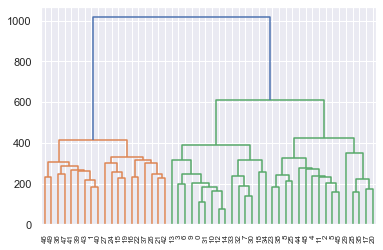

In [60]:
from scipy.cluster.hierarchy import linkage, dendrogram

linkage_matrix = linkage(cluster_count,method="ward")

dendrogram(linkage_matrix, labels=list(range(len(cluster_count))))




In [61]:
# Sort rows and columns based on clustering
sorted_indices = dendrogram(linkage_matrix, no_plot=True)['leaves']

sorted_clusters = cluster_count[sorted_indices][:,sorted_indices]

# Plots

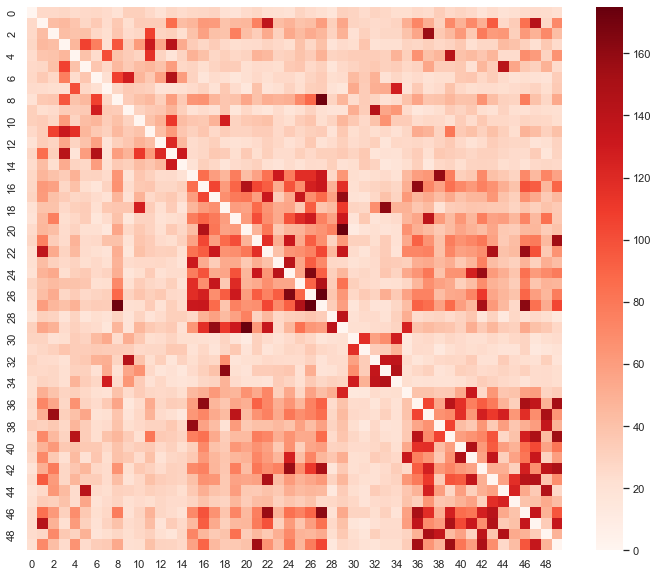

In [62]:
import seaborn as sns

sns.set()
fig, ax = plt.subplots(figsize=(12,10))
sns.heatmap(cluster_count,cmap="Reds")
plt.show()

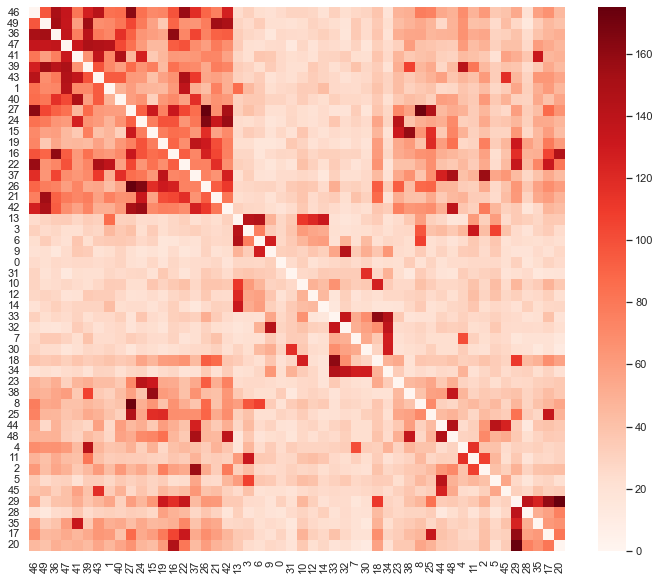

In [63]:
sns.set()
fig, ax = plt.subplots(figsize=(12,10))
sns.heatmap(sorted_clusters,xticklabels=sorted_indices,yticklabels=sorted_indices,cmap="Reds")

plt.show()

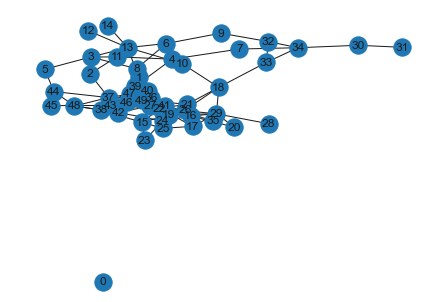

In [64]:
nx.draw(G,with_labels=True)

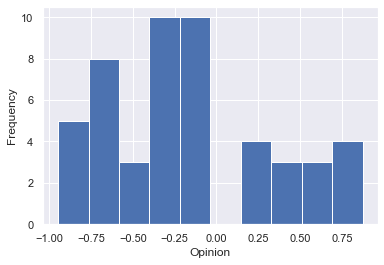

In [65]:
plt.hist(res[0])
plt.xlabel('Opinion')
plt.ylabel('Frequency')
plt.show()

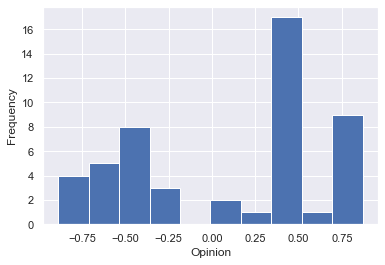

In [66]:
plt.hist(res[5])
plt.xlabel('Opinion')
plt.ylabel('Frequency')
plt.show()

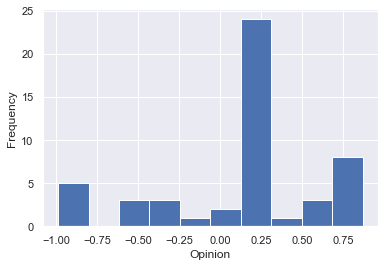

In [67]:
plt.hist(res[80])
plt.xlabel('Opinion')
plt.ylabel('Frequency')
plt.show()